<a href="https://colab.research.google.com/github/nicollcr/Nicoll_CrespoRoncallo_KC/blob/main/SEMANA8/TallerSemana8_NicollCrespo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **REGRESION**

# 1. CONEXION AL DRIVE

In [25]:
#CARGA DATOS
from google.colab import drive
import os
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [26]:
import os
#print(os.getcwd())
os.chdir("/content/gdrive/MyDrive/BOOTCAMP-SENA_DIGITAL-2021/SEMANA8/TALLER SEMANA 8")


# 2. EXPLORACION DE LOS DATOS

In [3]:
import pandas as pd
with open('wine_1.csv') as f:
    data_wine=pd.read_csv(f, delimiter=',')
data_wine.columns = ['Wine', 'Alcohol', 'Malic_acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid_phenols', 'Proanth', 'Color_int', 'Hue',
       'OD', 'Proline']
data_wine

,Wine,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanth,Color_int,Hue,OD,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


**NOTACION**

1) Alcohol

2) Malic acid

3) Ash

4) Alcalinity of ash

5) Magnesium

6) Total phenols

7) Flavanoids

8) Nonflavanoid phenols

9) Proanthocyanins

10)Color intensity

11)Hue

12)OD280/OD315 of diluted wines

13)Proline

In [4]:
data_wine.describe()

,Wine,Alcohol,Malic_acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid_phenols,Proanth,Color_int,Hue,OD,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


Text(0.5, 0.98, 'Relaciones entre la Prolina y otras caracteristicas del vino')

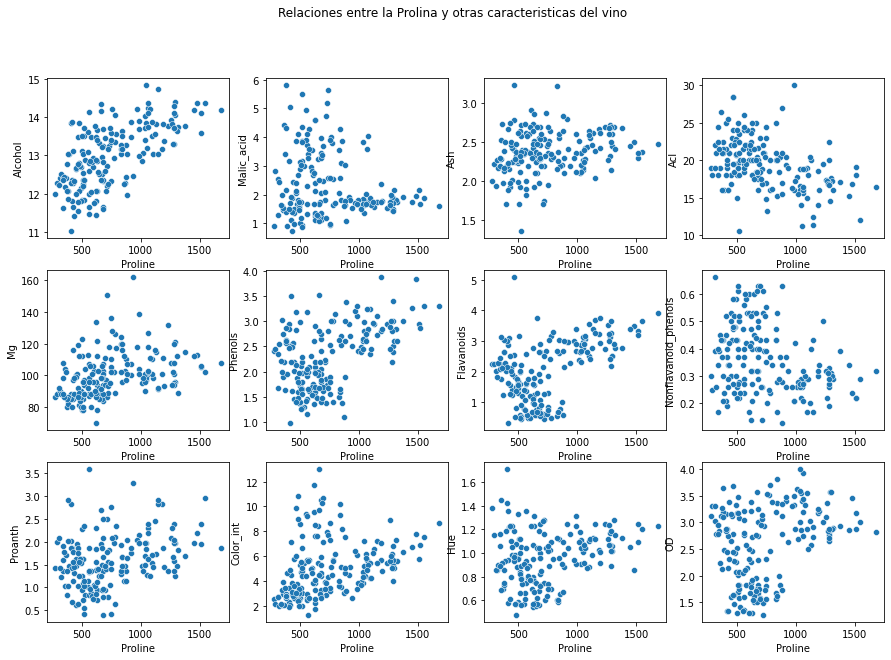

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(15,10))
plt.subplot(3,4,1)
sns.scatterplot(x=data_wine.Proline, y=data_wine.Alcohol)
plt.subplot(3,4,2)
sns.scatterplot(x=data_wine.Proline, y=data_wine.Malic_acid)
plt.subplot(3,4,3)
sns.scatterplot(x=data_wine.Proline, y=data_wine.Ash)
plt.subplot(3,4,4)
sns.scatterplot(x=data_wine.Proline, y=data_wine.Acl)
plt.subplot(3,4,5)
sns.scatterplot(x=data_wine.Proline, y=data_wine.Mg)
plt.subplot(3,4,6)
sns.scatterplot(x=data_wine.Proline, y=data_wine.Phenols)
plt.subplot(3,4,7)
sns.scatterplot(x=data_wine.Proline, y=data_wine.Flavanoids)
plt.subplot(3,4,8)
sns.scatterplot(x=data_wine.Proline, y=data_wine.Nonflavanoid_phenols)
plt.subplot(3,4,9)
sns.scatterplot(x=data_wine.Proline, y=data_wine.Proanth)
plt.subplot(3,4,10)
sns.scatterplot(x=data_wine.Proline, y=data_wine.Color_int)
plt.subplot(3,4,11)
sns.scatterplot(x=data_wine.Proline, y=data_wine.Hue)
plt.subplot(3,4,12)
sns.scatterplot(x=data_wine.Proline, y=data_wine.OD)
plt.suptitle('Relaciones entre la Prolina y otras caracteristicas del vino')

**Interpretacion:** De las graficas anteriores se puede ver que las variables que la mayoria presentan algun tipo de relacion con la Proline, sin embargo hay algunas como: Malic_acid, Color_int, Nonflavanoids_phenols que parecen no tener una relación lineal con el aumento de la Proline.

# 3. DEFINIR LA MATRIZ DE DISEÑO (X) Y EL VECTOR RESPUESTA (Y)

In [9]:
x = data_wine.iloc[:, :-1].values # toma todas las columnas, excepto la ultima
y = data_wine.iloc[:, -1].values # toma solo la ultima columna


# 4. NORMALIZAR

In [10]:
from sklearn.preprocessing import StandardScaler
X_n = StandardScaler().fit_transform(x)
X_n

array([[-1.21394365,  1.51861254, -0.5622498 , ...,  0.25171685,
         0.36217728,  1.84791957],
       [-1.21394365,  0.24628963, -0.49941338, ..., -0.29332133,
         0.40605066,  1.1134493 ],
       [-1.21394365,  0.19687903,  0.02123125, ...,  0.26901965,
         0.31830389,  0.78858745],
       ...,
       [ 1.37386437,  0.33275817,  1.74474449, ...,  2.22423597,
        -1.61212515, -1.48544548],
       [ 1.37386437,  0.20923168,  0.22769377, ...,  1.83492299,
        -1.56825176, -1.40069891],
       [ 1.37386437,  1.39508604,  1.58316512, ...,  1.79166599,
        -1.52437837, -1.42894777]])

In [11]:
import numpy as np
y_T = np.transpose(np.array([y])) 
y_T.shape

(178, 1)

In [12]:
Y_n = StandardScaler().fit_transform(y_T)
Y_n.shape

(178, 1)

# 5. DEFINIR MUESTRAS DE ENTRENAMIENTO Y TEST

In [13]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_n, Y_n, test_size=0.25, random_state=42,shuffle=True)

In [14]:
print('Train')
print(X_train.shape)
print(y_train.shape)
print('-------------')
print('Test')
print(X_test.shape)
print(y_test.shape)

Train
(133, 13)
(133, 1)
-------------
Test
(45, 13)
(45, 1)


# 6. ENTRENAMIENTO DEL MODELO

In [15]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

# 7. ANALISIS DE COEFICIENTES

In [16]:
#INTERSECTO
print(regressor.intercept_)

[-0.00232517]


In [17]:
#COEFICIENTES
print(regressor.coef_)

[[-0.75990723  0.15293898 -0.07397694  0.12222498 -0.08544996  0.08093001
   0.1573841  -0.42133872 -0.04912347  0.07940309  0.36741515  0.03440944
  -0.07374578]]


# 8. DESNORMALIZACION

In [18]:
data_wine_x= data_wine.drop(columns=['Proline'])
data_wine_x.columns

Index(['Wine', 'Alcohol', 'Malic_acid', 'Ash', 'Acl', 'Mg', 'Phenols',
       'Flavanoids', 'Nonflavanoid_phenols', 'Proanth', 'Color_int', 'Hue',
       'OD'],
      dtype='object')

In [19]:
np.mean(data_wine_x,axis=0)

Wine                     1.938202
Alcohol                 13.000618
Malic_acid               2.336348
Ash                      2.366517
Acl                     19.494944
Mg                      99.741573
Phenols                  2.295112
Flavanoids               2.029270
Nonflavanoid_phenols     0.361854
Proanth                  1.590899
Color_int                5.058090
Hue                      0.957449
OD                       2.611685
dtype: float64

In [20]:
np.std(data_wine_x,axis=0)

Wine                     0.772855
Alcohol                  0.809543
Malic_acid               1.114004
Ash                      0.273572
Acl                      3.330170
Mg                      14.242308
Phenols                  0.624091
Flavanoids               0.996049
Nonflavanoid_phenols     0.124103
Proanth                  0.570749
Color_int                2.311765
Hue                      0.227929
OD                       0.707993
dtype: float64

In [21]:
df=pd.DataFrame(regressor.coef_[0], data_wine_x.columns, columns=['Coeficiente'])
df['Medias']=np.mean(data_wine_x,axis=0)
df['Desviacion']=np.std(data_wine_x,axis=0)
df['Coef_final']=df.Medias + (df.Coeficiente*df.Desviacion) # Calculo del coeficiente sin normalizar
df

,Coeficiente,Medias,Desviacion,Coef_final
Wine,-0.759907,1.938202,0.772855,1.350904
Alcohol,0.152939,13.000618,0.809543,13.124429
Malic_acid,-0.073977,2.336348,1.114004,2.253938
Ash,0.122225,2.366517,0.273572,2.399954
Acl,-0.085450,19.494944,3.330170,19.210381
Mg,0.080930,99.741573,14.242308,100.894203
Phenols,0.157384,2.295112,0.624091,2.393334
Flavanoids,-0.421339,2.029270,0.996049,1.609596
Nonflavanoid_phenols,-0.049123,0.361854,0.124103,0.355758
Proanth,0.079403,1.590899,0.570749,1.636218


**Interpretacion:** De los datos obtenidos, se concluye que el factor que más influye, por lejos, es el Magnesio, porque por cada unidad que aumente el Magnesio en la composicion del vino, la Prolina aumentará en 100.89 unidades. Luego están la alcalinidad de las cenizas y el alcohol. Por cada unidad que aumente el Acl, la Prolina aumentará 19,21 y con el alcohol 13,12

# 9. CALCULO DE PREDICCIONES

In [19]:
#Hacemos nuestras predicciones
y_pred = regressor.predict(X_test)
y_pred

array([[ 0.97271604],
       [ 0.94287671],
       [-0.79876967],
       [ 1.11901564],
       [-0.63108268],
       [ 1.37068057],
       [-1.07261686],
       [-0.31064961],
       [-0.71783598],
       [-0.72699756],
       [ 0.63383671],
       [-0.2528659 ],
       [ 0.36343669],
       [-0.59656526],
       [ 1.50225674],
       [-0.91431455],
       [-0.55395307],
       [-0.67027437],
       [ 1.22930137],
       [-0.83556849],
       [ 1.47055375],
       [-0.434413  ],
       [-0.12635708],
       [-0.05434212],
       [-0.1616749 ],
       [-0.06439405],
       [-0.8196852 ],
       [-0.16658075],
       [-0.68067731],
       [ 1.35742301],
       [ 1.06519622],
       [-1.02386761],
       [-0.98795887],
       [ 1.1596794 ],
       [ 1.06193423],
       [ 0.97131572],
       [ 1.0390693 ],
       [-1.01752314],
       [-0.671921  ],
       [ 0.6688603 ],
       [ 0.54171368],
       [-0.72621746],
       [-0.44126773],
       [ 0.12387613],
       [-0.89712194]])

In [20]:
from sklearn import metrics 
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 0.4740948075813741
Mean Squared Error: 0.34272344148046824
Root Mean Squared Error: 0.5854258633511746


In [21]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)# El modelo captura el 70% de la variabilidad

0.7026391374337808

**Interpretacion:** 

*   En promedio las observaciones se desvian de las predicciones en 0.474
*   La varianza (dispersion) de las observaciones respecto a las predicciones es de 0,5854
*   El modelo captura el 70,26% de la variabilidad de los datos

**Conclusión:**

Se concluye que es un buen modelo debido que es capaz de capturar el 70% de la variabilidad de los datos y las diferencias en general, entre observaciones y predicciones es pequeña teniendo en cuenta que los valores de Prolina se manejan en promedio en 746,89

In [22]:
media_y= np.mean(data_wine.Proline)
desviacion_y= np.mean(data_wine.Proline)
desviacion_y

746.8932584269663

In [23]:
df_n= pd.DataFrame(X_test, columns=data_wine_x.columns)
df_n['y_pred']=y_pred
df_n['y_pred_final']=(y_pred*desviacion_y)+media_y
df_n['y_test']=(y_test*desviacion_y)+media_y
df_n

,Wine,Alcohol,Malic.acid,Ash,Acl,Mg,Phenols,Flavanoids,Nonflavanoid.phenols,Proanth,Color.int,Hue,OD,y_pred,y_pred_final,y_test
0,-1.213944,0.789806,0.685502,0.707247,-1.289707,1.141558,0.648764,1.004700,-1.545922,0.121071,0.018129,0.011190,1.056952,0.972716,1473.408311,980.237877
1,-1.213944,1.493907,1.529305,0.268606,-0.178653,0.790492,0.889114,0.623193,-0.498407,-0.597284,0.078689,-0.383670,1.014578,0.942877,1451.121518,1539.179950
2,1.373864,-0.087232,0.425180,1.218995,0.451946,-0.262708,-1.209940,-1.535336,1.354888,-1.473326,-0.198156,-0.822404,-0.426113,-0.798770,150.297579,397.511036
3,-1.213944,0.900980,-0.750759,1.218995,0.902373,0.088358,1.129464,1.225573,-0.578985,1.382572,0.277671,1.020278,0.138864,1.119016,1582.678492,2026.767716
4,0.079960,-0.778980,-1.046988,-1.632171,0.031547,-1.526548,-0.296611,-0.029386,-0.740141,-0.965221,-0.163550,0.713164,1.226445,-0.631083,275.541857,183.448114
5,-1.213944,1.605081,-0.373741,1.292101,0.151661,1.422412,0.808997,1.115136,-0.256673,0.664217,0.493956,0.493797,0.054117,1.370681,1770.645338,2014.875331
6,0.079960,-1.236028,0.981731,-1.339744,-0.148624,-0.894628,-0.472868,-0.390814,0.065639,0.489009,-1.634288,-0.120430,0.619094,-1.072617,-54.237045,311.885867
7,1.373864,0.493343,1.412609,0.414820,1.052516,0.158572,-0.793334,-1.284344,0.549108,-0.316950,0.969783,-1.129518,-1.485445,-0.310650,514.871156,754.282572
8,0.079960,-1.717782,-0.885409,1.218995,0.151661,-0.403135,0.712858,0.894264,-0.578985,1.575301,-1.041667,0.011190,0.915707,-0.717836,210.746401,587.789188
9,1.373864,0.443932,0.200764,-0.060375,0.151661,-0.754202,-1.434267,-1.535336,0.065639,-1.666055,0.234414,-1.129518,-0.200123,-0.726998,203.903684,825.636879


# **CLASIFICACION**

# 1. CARGA DE LOS DATOS

In [27]:
import pandas as pd
with open('Breast_cancer_1.csv') as f:
    data_cancer=pd.read_csv(f, delimiter=',')
data_cancer.columns = ['id', 'diagnosis', 'radius_mean', 'texture_mean', 'perimeter_mean',
       'area_mean', 'smoothness_mean', 'compactness_mean', 'concavity_mean',
       'concave_points_mean', 'symmetry_mean', 'fractal_dimension_mean',
       'radius_se', 'texture_se', 'perimeter_se', 'area_se', 'smoothness_se',
       'compactness_se', 'concavity_se', 'concave_points_se', 'symmetry_se',
       'fractal_dimension_se', 'radius_worst', 'texture_worst',
       'perimeter_worst', 'area_worst', 'smoothness_worst',
       'compactness_worst', 'concavity_worst', 'concave points_worst',
       'symmetry_worst', 'fractal_dimension_worst', 'Unnamed: 32']
data_cancer

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave_points_mean,symmetry_mean,fractal_dimension_mean,radius_se,texture_se,perimeter_se,area_se,smoothness_se,compactness_se,concavity_se,concave_points_se,symmetry_se,fractal_dimension_se,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,926424,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623,1.1760,1.2560,7.673,158.70,0.010300,0.02891,0.05198,0.02454,0.01114,0.004239,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115,NaN
565,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533,0.7655,2.4630,5.203,99.04,0.005769,0.02423,0.03950,0.01678,0.01898,0.002498,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637,NaN
566,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648,0.4564,1.0750,3.425,48.55,0.005903,0.03731,0.04730,0.01557,0.01318,0.003892,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820,NaN
567,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,0.07016,0.7260,1.5950,5.772,86.22,0.006522,0.06158,0.07117,0.01664,0.02324,0.006185,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400,NaN


1) ID number

2) Diagnosis (M = malignant, B = benign) 

Ten real-valued features are computed for each cell nucleus:

a) radius (mean of distances from center to points on the perimeter)

b) texture (standard deviation of gray-scale values)

c) perimeter

d) area

e) smoothness (local variation in radius lengths)

f) compactness (perimeter^2 / area - 1.0)

g) concavity (severity of concave portions of the contour)

h) concave points (number of concave portions of the contour)

i) symmetry

j) fractal dimension ("coastline approximation" - 1)

# 2. GRAFICOS DESCRIPTIVOS

Text(0.5, 0.98, 'Relaciones entre presentar cancer vs variables del nucleo celular')

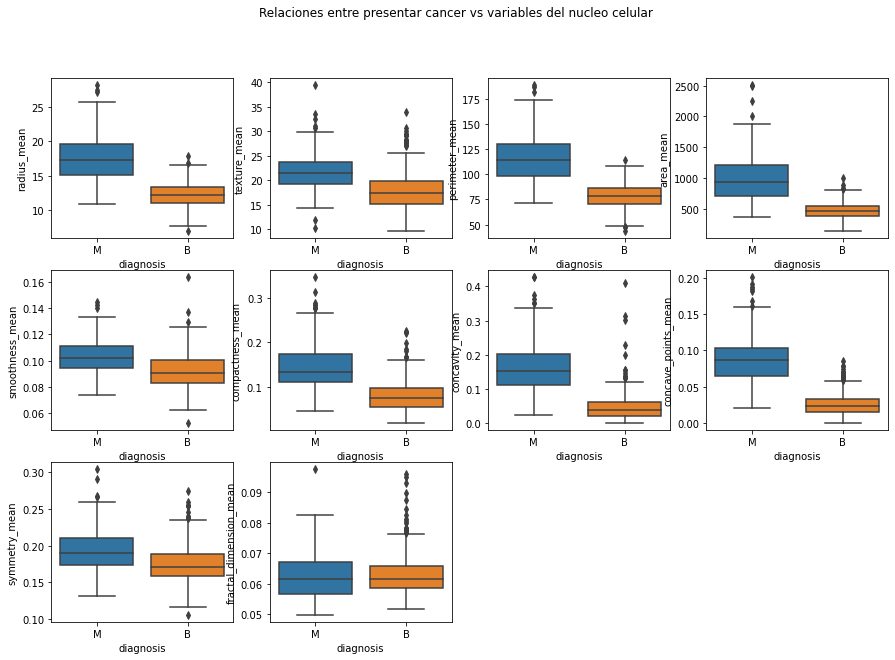

In [28]:
import seaborn as sns
plt.figure(figsize=(15,10))
plt.subplot(3,4,1)
sns.boxplot(x = data_cancer.diagnosis, y=data_cancer.radius_mean)
plt.subplot(3,4,2)
sns.boxplot(x = data_cancer.diagnosis, y=data_cancer.texture_mean)
plt.subplot(3,4,3)
sns.boxplot(x = data_cancer.diagnosis, y=data_cancer.perimeter_mean)
plt.subplot(3,4,4)
sns.boxplot(x = data_cancer.diagnosis, y=data_cancer.area_mean)
plt.subplot(3,4,5)
sns.boxplot(x = data_cancer.diagnosis, y=data_cancer.smoothness_mean)
plt.subplot(3,4,6)
sns.boxplot(x = data_cancer.diagnosis, y=data_cancer.compactness_mean)
plt.subplot(3,4,7)
sns.boxplot(x = data_cancer.diagnosis, y=data_cancer.concavity_mean)
plt.subplot(3,4,8)
sns.boxplot(x = data_cancer.diagnosis, y=data_cancer.concave_points_mean)
plt.subplot(3,4,9)
sns.boxplot(x = data_cancer.diagnosis, y=data_cancer.symmetry_mean)
plt.subplot(3,4,10)
sns.boxplot(x = data_cancer.diagnosis, y=data_cancer.fractal_dimension_mean)
plt.suptitle('Relaciones entre presentar cancer vs variables del nucleo celular')

**Interpretacion:** De la gráfica anterior se puede concluir que las variables que menos parecen influir en el diágnostico son fractal_dimension, symmetry y smoothness, y las que mas influye concave_points

# 3. DEFINIR MATRIZ DE DISEÑO X Y VECTOR Y

In [29]:
X=data_cancer.drop(columns=['diagnosis', 'id', 'Unnamed: 32'])
y= data_cancer['diagnosis']

# 4. SEPARAR EN TRAIN Y TEST

In [30]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42,shuffle=True)

# 5. SELECCIONAR Y ENTRENAR EL ALGORITMO

In [31]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42, n_estimators=100,class_weight="balanced", max_features="log2")
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight='balanced',
                       criterion='gini', max_depth=None, max_features='log2',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=42, verbose=0,
                       warm_start=False)

# 6. HACER LAS PREDICCIONES

In [32]:
y_pred= model.predict(X_test)
y_pred

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'M', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B'],
      dtype=object)

In [33]:
y_test

204    B
70     M
131    M
431    B
540    B
      ..
89     B
199    M
411    B
18     M
390    B
Name: diagnosis, Length: 143, dtype: object

# VALIDACION DEL MODELO

In [34]:
from sklearn.metrics import classification_report
M=classification_report(y_test,y_pred)
print(M)

              precision    recall  f1-score   support

           B       0.99      0.99      0.99        89
           M       0.98      0.98      0.98        54

    accuracy                           0.99       143
   macro avg       0.99      0.99      0.99       143
weighted avg       0.99      0.99      0.99       143



**Interpretación:** 


*   El 99% de los datos fue clasificado correctamente 
*   Mas del 98% fueron detectados positivamente en ambas clases
*   El tener alta precision y alto recall en ambas clases, indica que el modelo las maneja perfectamente

